In [1]:
# 导入 opencv-python
import cv2

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [2]:
import os
# 根据本文件的位置重定位项目路径
os.chdir(r'/home/featurize/work/mmocr')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/maskrcnn/mask_rcnn_r50_fpn_160e_icdar2017_20210218-c6ec3ebb.pth


/home/featurize/work/.local/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[{'boundary_result': [[1629.1126708984375, 1713.652587890625, 1639.5745849609375, 1611.648681640625, 2303.310546875, 1679.72412109375, 2292.8486328125, 1781.72802734375, 0.9759532], [1627.4326171875, 1593.030029296875, 1638.660888671875, 1485.024169921875, 2276.38720703125, 1551.322509765625, 2265.158935546875, 1659.328369140625, 0.9758482], [2427.220458984375, 489.6483154296875, 2608.875732421875, 474.5103759765625, 2698.082763671875, 1544.9930419921875, 2516.427490234375, 1560.1309814453125, 0.94609594], [1582.7130126953125, 1337.431396484375, 1600.2593994140625, 1218.01171875, 2253.662109375, 1314.01611328125, 2236.11572265625, 1433.435791015625, 0.9218333], [1721.22314453125, 461.1868896484375, 1724.127685546875, 333.3892822265625, 2132.0078125, 342.6593017578125, 2129.103271484375, 470.4569091796875, 0.91303456], [1647.925537109375, 1462.530029296875, 1660.497802734375, 1365.432861328125, 2258.505615234375, 1442.8642578125, 2245.933349609375, 1539.96142578125, 0.906688], [1792.401

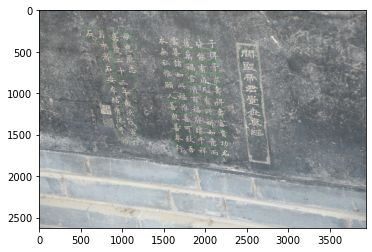

In [3]:
from mmocr.utils.ocr import MMOCR

my_ocr = {'det': 'MaskRCNN_IC17',
          'det_config':
          'configs/textdet/maskrcnn/mask_rcnn_r50_fpn_160e_icdar2017-stone.py',
          'det_ckpt':
          'demo/det/latest.pth',
          'recog': 'SAR',
          'recog_config':
          'configs/textrecog/sar/sar_r31_parallel_decoder_stone_dataset.py',
          'recog_ckpt':
          'demo/recog/chinese_26_word_recog.pth'}

# 导入模型到内存
ocr = MMOCR(det='MaskRCNN_IC17',
            recog=None)

# 推理
results = ocr.readtext('demo/input/2 (473).JPG', output='demo/out/det_out.jpg', export='demo/', merge=False)
print(results)
# 展示结果
show_img_from_path('demo/out/det_out.jpg')

[[1629 1713]
 [1639 1611]
 [2303 1679]
 [2292 1781]]


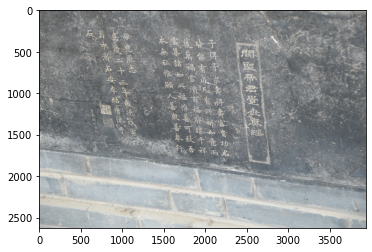

In [13]:
import numpy as np

img = cv2.imread('demo/input/2 (473).JPG')
show_img_from_array(img)

In [24]:
import sys
sys.path.append('work/tools')
import shutil
from cutter import cutter

In [25]:
save_path = 'work/save'
if os.path.exists(save_path):
        shutil.rmtree(save_path)
os.makedirs(os.path.join(save_path, "intermediate"))
os.makedirs(os.path.join(save_path, "result"))
for each in results[0]['boundary_result']: # 遍历每片文字区域
    if each[-1] > 0.5: # 置信度阈值
        point_coords = np.array(each[:-1], dtype = np.int32).reshape(-1,2)
        # print(point_coords)
        # point_coords = np.array([point_coords], dtype = np.int32)
        # cv2.fillPoly(img, point_coords, (0,255,0)) # 多边形填充，颜色为 (蓝，绿，红)
        cutter(img,point_coords,save_path)
        
    else:
        pass

load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_chineseocr_20210507-b4be8214.pth


Downloading: "https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_chineseocr_20210507-b4be8214.pth" to /home/featurize/.cache/torch/hub/checkpoints/sar_r31_parallel_decoder_chineseocr_20210507-b4be8214.pth


  0%|          | 0.00/308M [00:00<?, ?B/s]

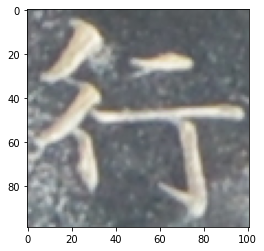

[{'text': '行', 'score': 0.999697208404541}]
\è¡


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\è'


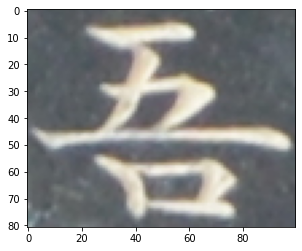

[{'text': '吾王', 'score': 0.48030039109289646}]
\å¾ç


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\å'


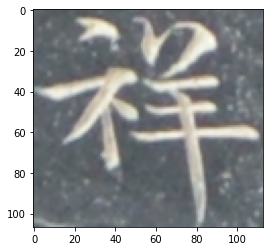

[{'text': '祥光', 'score': 0.5713881999254227}]
\ç¥¥å


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\ç'


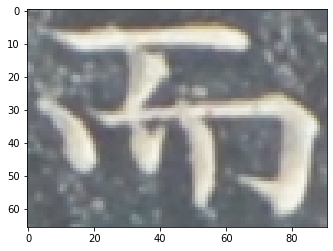

[{'text': 'From:', 'score': 0.7282453149557113}]
\From:


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\F'


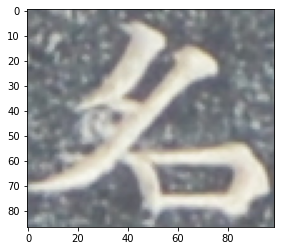

[{'text': '名:2', 'score': 0.40061844636996585}]
\å:2


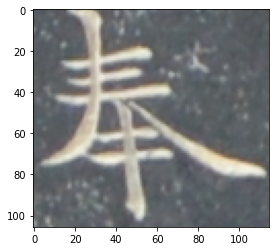

[{'text': '本版:', 'score': 0.18532306204239526}]
\æ¬ç:


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\æ'


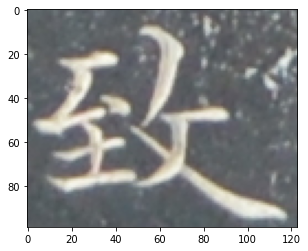

[{'text': '致...', 'score': 0.5721184480935335}]
\è´...


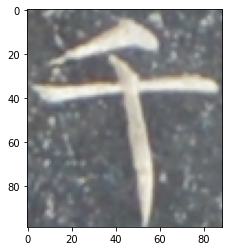

[{'text': 'file', 'score': 0.5676318109035492}]
ile


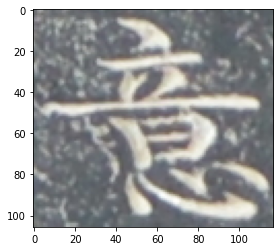

[{'text': '意', 'score': 0.6802976131439209}]
\æ


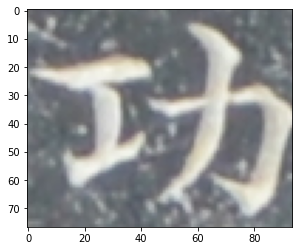

[{'text': '功力', 'score': 0.9195429682731628}]
\åå


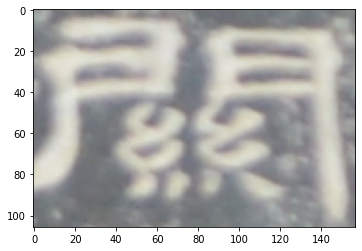

[{'text': '尼司)', 'score': 0.36527616282304126}]
\å°¼å¸)


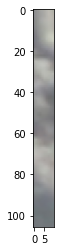

[{'text': 'will', 'score': 0.5611799200996757}]
\will


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\w'


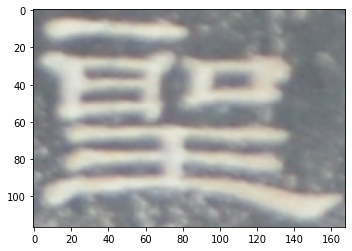

[{'text': 'From:', 'score': 0.7144283145666123}]
\From:


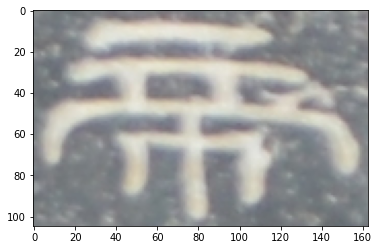

[{'text': '开票日期', 'score': 0.6573122143745422}]
\å¼ç¥¨æ¥æ


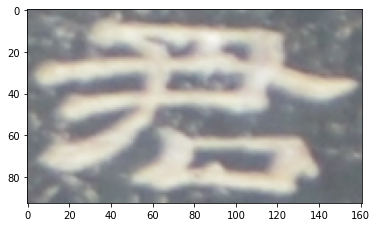

[{'text': '天然气股份有限公司', 'score': 0.568322011993991}]
\å¤©ç¶æ°è¡ä»½æéå¬å¸


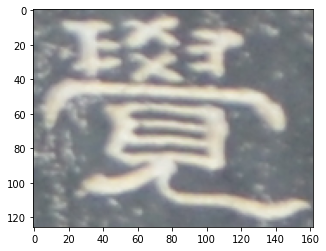

[{'text': '觉得', 'score': 0.13025375828146935}]
\è§å¾


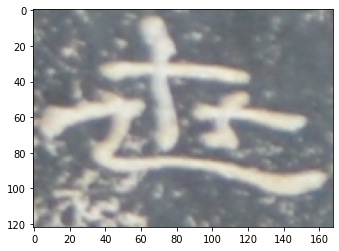

[{'text': "it's", 'score': 0.42957497760653496}]
\it's


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\i'


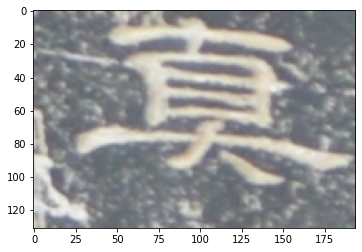

[{'text': 'that', 'score': 0.49468932673335075}]
	hat


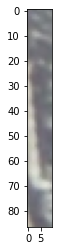

[{'text': 'that', 'score': 0.5026710946112871}]
	hat


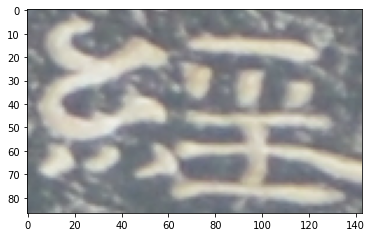

[{'text': '一品)', 'score': 0.09339685489734013}]
\ä¸å)


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\ä'


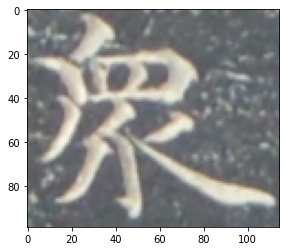

[{'text': 'Re:', 'score': 0.35197917620340985}]
\Re:


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\R'


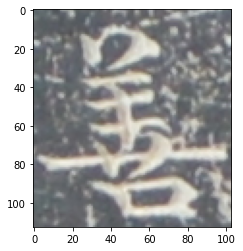

[{'text': 'that', 'score': 0.5029977904632688}]
	hat


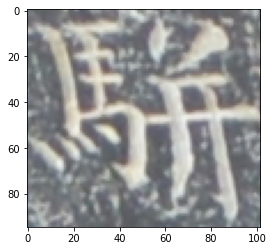

[{'text': 'BARK', 'score': 0.2948766117915511}]
\BARK


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\B'


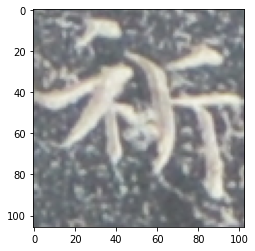

[{'text': 'this', 'score': 0.5568365454673767}]
	his


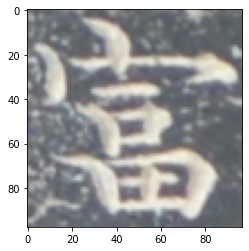

[{'text': 'Apr9', 'score': 0.3831670954823494}]
\Apr9


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\A'


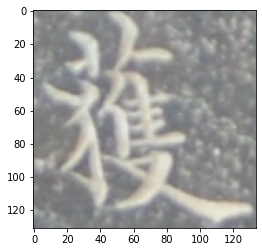

[{'text': '渡', 'score': 0.307736337184906}]
\æ¸¡


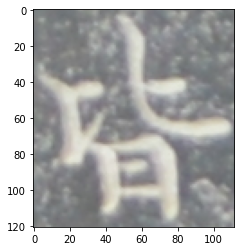

[{'text': 'that', 'score': 0.5824268609285355}]
	hat


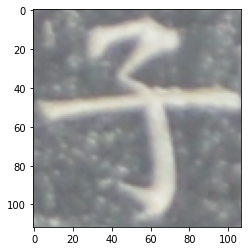

[{'text': 'shop', 'score': 0.5638004019856453}]
\shop


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\s'


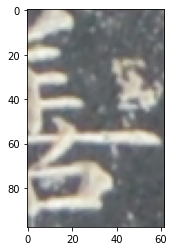

[{'text': 'that', 'score': 0.5785319358110428}]
	hat


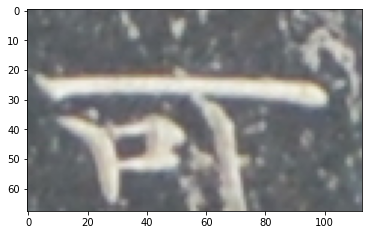

[{'text': 'will', 'score': 0.5293856263160706}]
\will


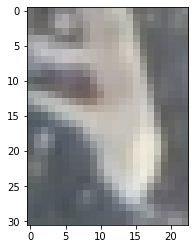

[{'text': 'real', 'score': 0.43158865347504616}]
eal


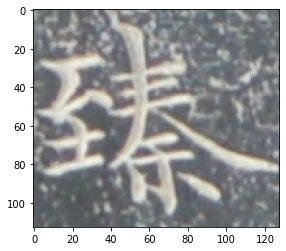

[{'text': '蔡婷婷', 'score': 0.14851826801896095}]
\è¡å©·å©·


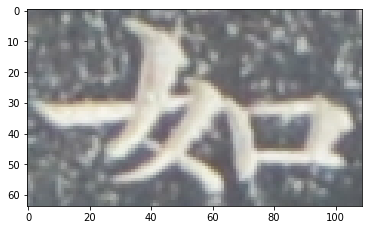

[{'text': '大学生', 'score': 0.11673309281468391}]
\å¤§å­¦ç


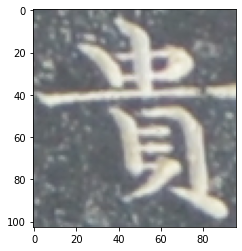

[{'text': '贵州省', 'score': 0.40959184368451435}]
\è´µå·ç


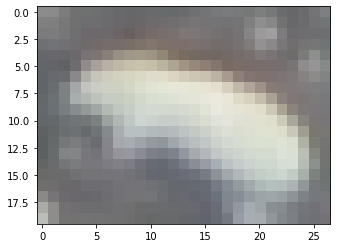

[{'text': 'will', 'score': 0.577039085328579}]
\will


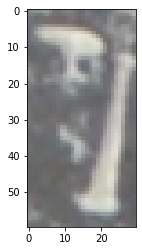

[{'text': 'with', 'score': 0.5079199634492397}]
\with


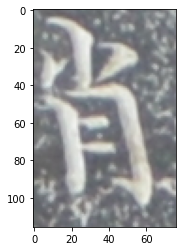

[{'text': 'Apr1993', 'score': 0.6008180763040271}]
\Apr1993


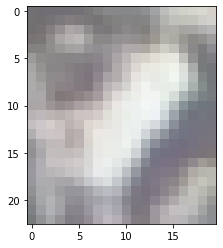

[{'text': 'Sender:', 'score': 0.6889475605317524}]
\Sender:


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\S'


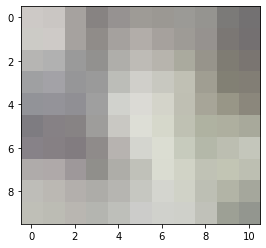

[{'text': '(Inc.', 'score': 0.2227904364466667}]
\(Inc.


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\('


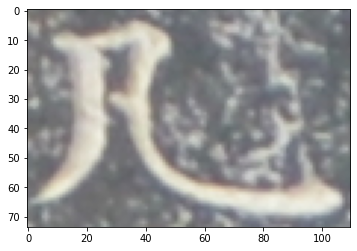

[{'text': 'From:', 'score': 0.6942672997713089}]
\From:


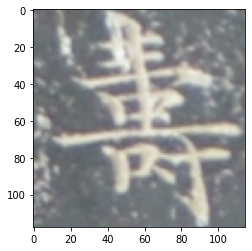

[{'text': '-take', 'score': 0.4392837926745415}]
\-take


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\-'


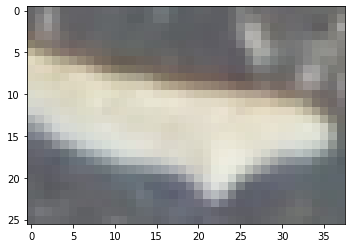

[{'text': 'with', 'score': 0.5356739312410355}]
\with


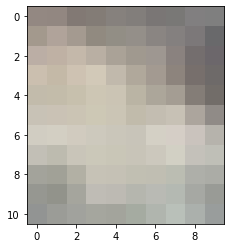

[{'text': 'this', 'score': 0.4746844284236431}]
	his


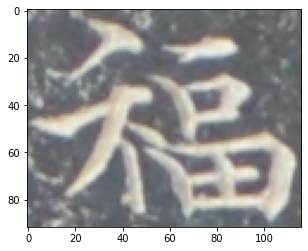

[{'text': '福昌市', 'score': 0.3035147463281949}]
\ç¦æå¸


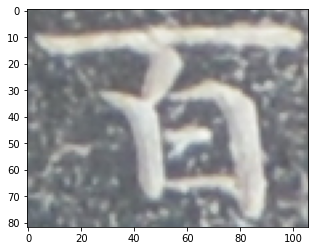

[{'text': 'This', 'score': 0.41191255673766136}]
\This


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\T'


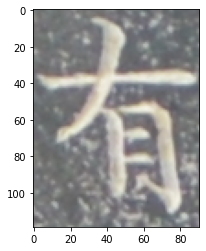

[{'text': '有限公司', 'score': 0.5701259952038527}]
\æéå¬å¸


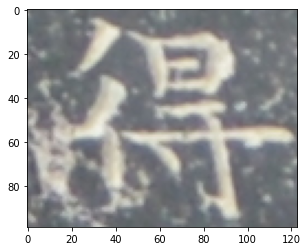

[{'text': '保健', 'score': 0.24549074843525887}]
\ä¿å¥


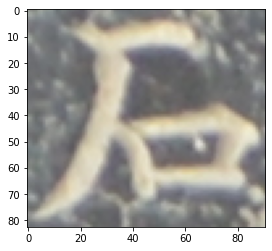

[{'text': 'EXIT', 'score': 0.2510210908949375}]
\EXIT


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\E'


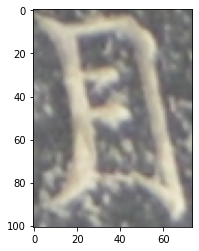

[{'text': 'ofthe', 'score': 0.5104404896497726}]
\ofthe


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\o'


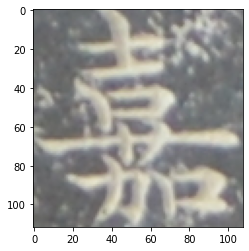

[{'text': '中国铁路', 'score': 0.26425497978925705}]
\ä¸­å½éè·¯


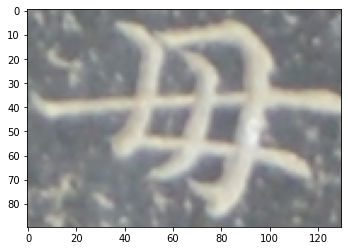

[{'text': '-Jost', 'score': 0.25120015144348146}]
\-Jost


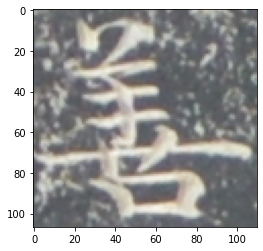

[{'text': 'good', 'score': 0.2980497246608138}]
\good


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\g'


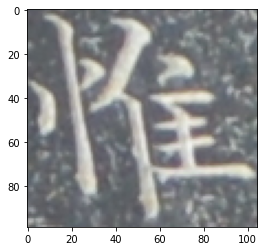

[{'text': '惟有', 'score': 0.35755150578916073}]
\ææ


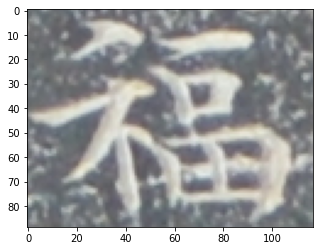

[{'text': '福建省', 'score': 0.3501177380482356}]
\ç¦å»ºç


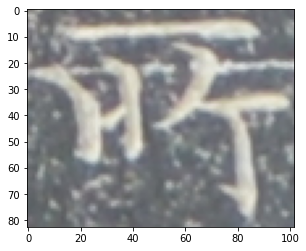

[{'text': 'This', 'score': 0.5833367854356766}]
\This


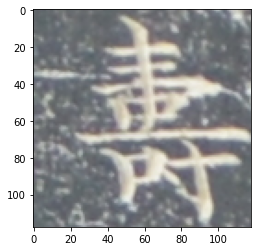

[{'text': '妻子妻', 'score': 0.18629648039738336}]
\å¦»å­å¦»


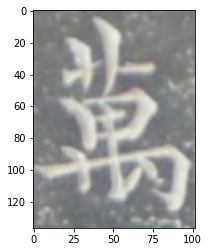

[{'text': 'that', 'score': 0.46536155696958303}]
	hat


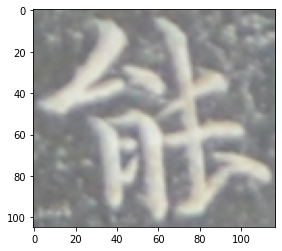

[{'text': '能量。', 'score': 0.2201299568017324}]
\è½éã


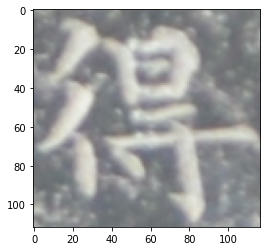

[{'text': '得', 'score': 0.9982638955116272}]
\å¾


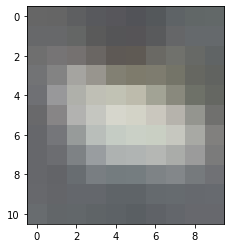

[{'text': 'your', 'score': 0.5253096558153629}]
\your


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\y'


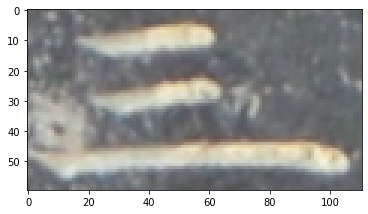

[{'text': 'EEL', 'score': 0.38348006705443066}]
\EEL


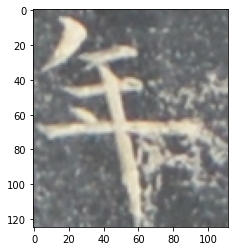

[{'text': 'this', 'score': 0.48938044160604477}]
	his


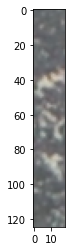

[{'text': 'that', 'score': 0.5100604966282845}]
	hat


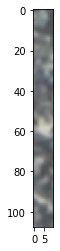

[{'text': 'Sender:', 'score': 0.6784819928663117}]
\Sender:


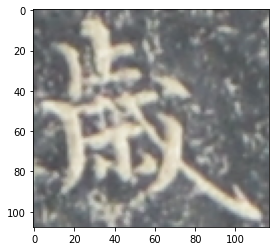

[{'text': 'allo', 'score': 0.2687877528369427}]
llo


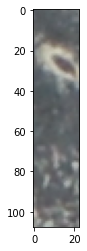

[{'text': 'Sender:', 'score': 0.6550930483000619}]
\Sender:


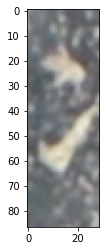

[{'text': 'ofthe', 'score': 0.5466870710253715}]
\ofthe


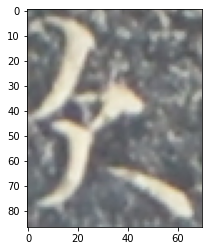

[{'text': 'that', 'score': 0.5430888719856739}]
	hat


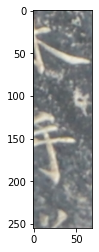

[{'text': 'Lines:', 'score': 0.7917334648470084}]
\Lines:


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\L'


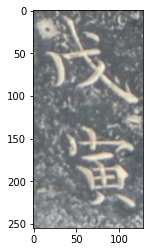

[{'text': 'play', 'score': 0.31858285516500473}]
\play


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\p'


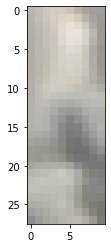

[{'text': 'Xref:', 'score': 0.6719173282384873}]
\Xref:


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\X'


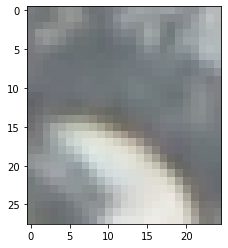

[{'text': 'that', 'score': 0.4998215716332197}]
	hat


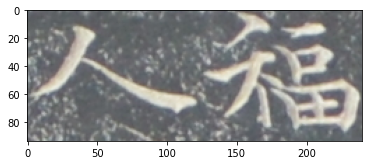

[{'text': '人心福', 'score': 0.5083999708294868}]
\äººå¿ç¦


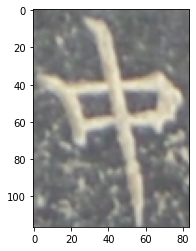

[{'text': '中国银行', 'score': 0.5644132234156132}]
\ä¸­å½é¶è¡


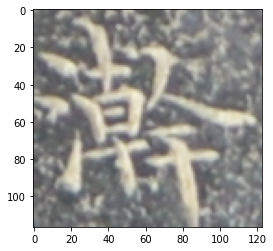

[{'text': 'Please', 'score': 0.33773962780833244}]
\Please


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\P'


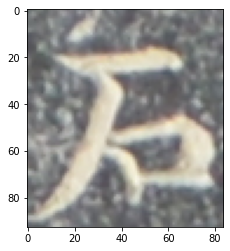

[{'text': '石油天然气股份有限公司', 'score': 0.6352049132639711}]
\ç³æ²¹å¤©ç¶æ°è¡ä»½æéå¬å¸


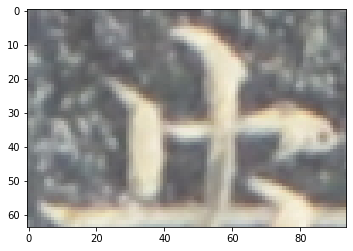

[{'text': 'all.', 'score': 0.4322633743286133}]
ll.


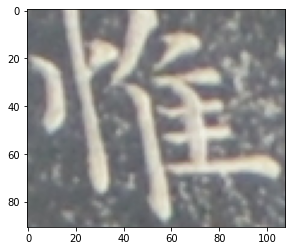

[{'text': '惟佳', 'score': 0.08292717859148979}]
\æä½³


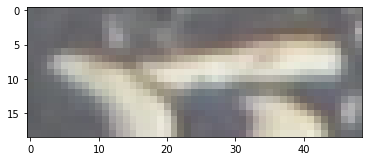

[{'text': 'were', 'score': 0.5223352387547493}]
\were


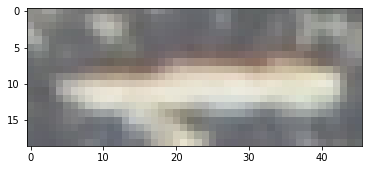

[{'text': '-------', 'score': 0.30708038061857224}]
\-------


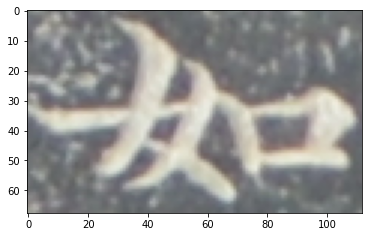

[{'text': '大众口', 'score': 0.2198532521724701}]
\å¤§ä¼å£


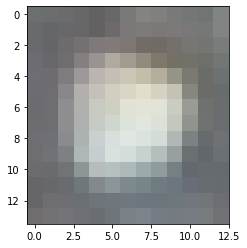

[{'text': 'all', 'score': 0.5672995249430338}]
ll


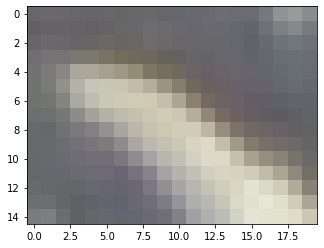

[{'text': 'that', 'score': 0.5100324340164661}]
	hat


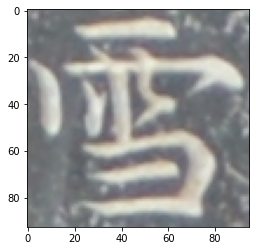

[{'text': '雪', 'score': 0.7871624827384949}]
\éª


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\é'


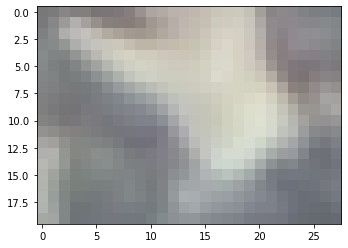

[{'text': '>>>', 'score': 0.16143305599689484}]
\>>>


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\>'


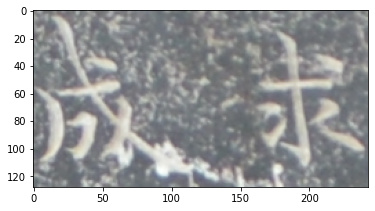

[{'text': '欣家家', 'score': 0.2780216187238693}]
\æ¬£å®¶å®¶


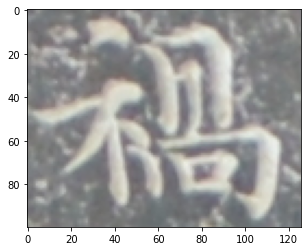

[{'text': '福建省', 'score': 0.25060681998729706}]
\ç¦å»ºç


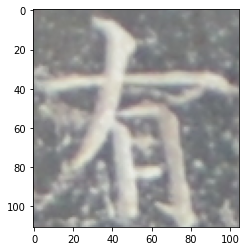

[{'text': '有....', 'score': 0.5074823424220085}]
\æ....


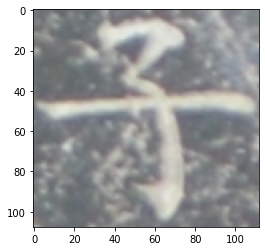

[{'text': 'that', 'score': 0.5015113465487957}]
	hat


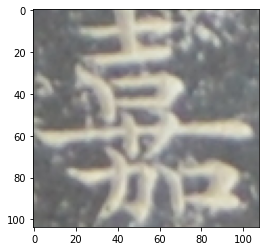

[{'text': '嘉靖市', 'score': 0.10724927981694539}]
\åéå¸


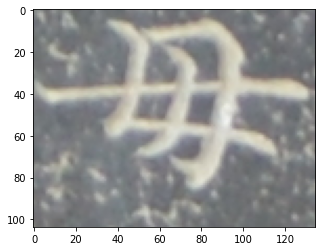

[{'text': '发票专用章', 'score': 0.6666065096855164}]
\åç¥¨ä¸ç¨ç« 


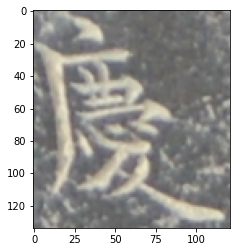

[{'text': 'just', 'score': 0.6647291854023933}]
\just


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\j'


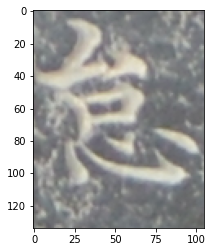

[{'text': 'this', 'score': 0.5095522329211235}]
	his


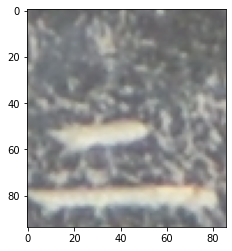

[{'text': 'this', 'score': 0.44304709509015083}]
	his


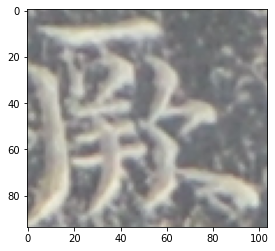

[{'text': 'Brit', 'score': 0.20299165043979883}]
\Brit


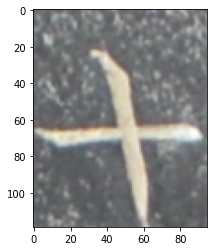

[{'text': '十', 'score': 0.3999343514442444}]
\å


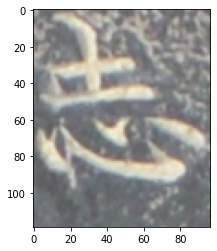

[{'text': 'all', 'score': 0.6105840504169464}]
ll


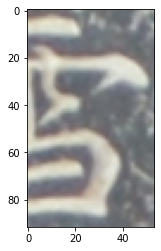

[{'text': 'Lines:', 'score': 0.8656467298666636}]
\Lines:


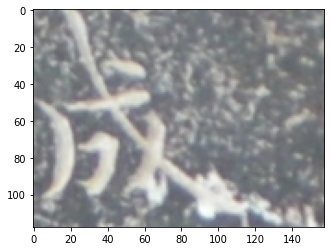

[{'text': 'need', 'score': 0.36546968668699265}]

eed


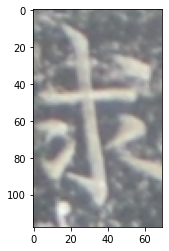

[{'text': 'Hill', 'score': 0.35567743703722954}]
\Hill


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: invalid escape sequence '\H'


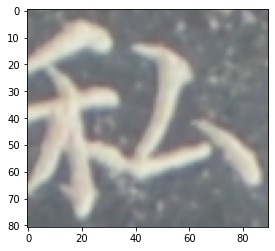

[{'text': '私人', 'score': 0.8714538216590881}]
\ç§äºº


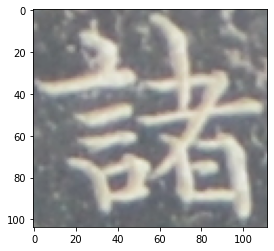

[{'text': '站K66', 'score': 0.2057180404663086}]
\ç«K66


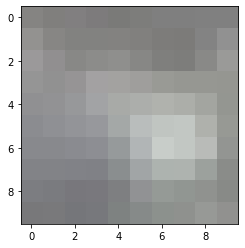

[{'text': 'will', 'score': 0.7417851984500885}]
\will


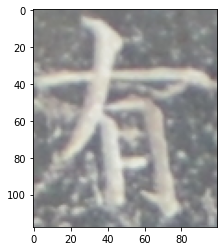

[{'text': '有....', 'score': 0.5750231519341469}]
\æ....


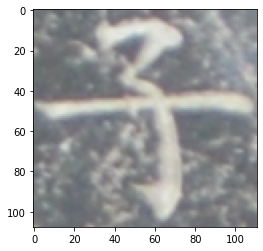

[{'text': '子,子', 'score': 0.12278809025883675}]
\å­,å­


error: OpenCV(4.5.4) /tmp/pip-req-build-3129w7z7/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [32]:
# 导入模型到内存
# ocr = MMOCR(det=None,
#             recog= 'SAR',
#             recog_config=
#             'configs/textrecog/sar/sar_r31_parallel_decoder_stone_dataset.py',
#             recog_ckpt=
#             'demo/recog/chinese_26_word_recog.pth')


ocr = MMOCR(det=None,
            recog= 'SAR_CN')


save_path = 'work/save'
path = os.path.join(save_path, "intermediate")
save = os.path.join(save_path, "result")
char_imgs = os.listdir(path)
for each in char_imgs:
    result = ocr.readtext(os.path.join(path, each), output=None, export='demo/', merge=False)
    show_img_from_path(os.path.join(path, each))
    print(result)
    bs = '\\'+result[0]['text']
    print(bs.encode('utf-8').decode('unicode_escape'))